# Cyclistic Case Study Analysis

## Question to answer:
1. First analyze distinct trends between *Casual* and *Member* riders, how do they differently use platform?

In [1]:
# Required libraries
import numpy as np 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyclistic-case-data/202101-divvy-tripdata/202101-divvy-tripdata.csv
/kaggle/input/cyclistic-case-data/202104-divvy-tripdata/202104-divvy-tripdata.csv
/kaggle/input/cyclistic-case-data/202106-divvy-tripdata/202106-divvy-tripdata.csv
/kaggle/input/cyclistic-case-data/202105-divvy-tripdata/202105-divvy-tripdata.csv
/kaggle/input/cyclistic-case-data/202107-divvy-tripdata/202107-divvy-tripdata.csv
/kaggle/input/cyclistic-case-data/202111-divvy-tripdata/202111-divvy-tripdata.csv
/kaggle/input/cyclistic-case-data/202102-divvy-tripdata/202102-divvy-tripdata.csv
/kaggle/input/cyclistic-case-data/202103-divvy-tripdata/202103-divvy-tripdata.csv
/kaggle/input/cyclistic-case-data/202108-divvy-tripdata/202108-divvy-tripdata.csv
/kaggle/input/cyclistic-case-data/202110-divvy-tripdata/202110-divvy-tripdata.csv
/kaggle/input/cyclistic-case-data/202109-divvy-tripdata/202109-divvy-tripdata.csv
/kaggle/input/cyclistic-case-data/202112-divvy-tripdata/202112-divvy-tripdata.csv


## Data Preparation

* Reading individual CSVs and concatenating all the data frames into one final dataframe.

In [2]:
data_01 = pd.read_csv("../input/cyclistic-case-data/202101-divvy-tripdata/202101-divvy-tripdata.csv")
data_02 = pd.read_csv("../input/cyclistic-case-data/202102-divvy-tripdata/202102-divvy-tripdata.csv")
data_03 = pd.read_csv("../input/cyclistic-case-data/202103-divvy-tripdata/202103-divvy-tripdata.csv")
data_04 = pd.read_csv("../input/cyclistic-case-data/202104-divvy-tripdata/202104-divvy-tripdata.csv")
data_05 = pd.read_csv("../input/cyclistic-case-data/202105-divvy-tripdata/202105-divvy-tripdata.csv")
data_06 = pd.read_csv("../input/cyclistic-case-data/202106-divvy-tripdata/202106-divvy-tripdata.csv")
data_07 = pd.read_csv("../input/cyclistic-case-data/202107-divvy-tripdata/202107-divvy-tripdata.csv")
data_08 = pd.read_csv("../input/cyclistic-case-data/202108-divvy-tripdata/202108-divvy-tripdata.csv")
data_09 = pd.read_csv("../input/cyclistic-case-data/202109-divvy-tripdata/202109-divvy-tripdata.csv")
data_10 = pd.read_csv("../input/cyclistic-case-data/202110-divvy-tripdata/202110-divvy-tripdata.csv")
data_11 = pd.read_csv("../input/cyclistic-case-data/202111-divvy-tripdata/202111-divvy-tripdata.csv")
data_12 = pd.read_csv("../input/cyclistic-case-data/202112-divvy-tripdata/202112-divvy-tripdata.csv")

# Concatinating all months of data into one dataframe
final_df = [data_01, data_02, data_03, data_04, data_05, data_06, data_07, data_08, data_09, data_10, data_11, data_12]
complete_21_data = pd.concat(final_df, ignore_index = True)
complete_21_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595058,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
5595059,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
5595060,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
5595061,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member


We will only need following fields to continue analyzing:
1. ride_id
2. rideable_type
3. started_at
4. ended_at
5. member_casual

In [3]:
q1_df = complete_21_data.filter(['ride_id','rideable_type','started_at','ended_at','member_casual'],axis=1)
q1_df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual


### Step1: Data integrity and Cleaning checks

Let's start with NaN check.

In [4]:
nan_count_member = q1_df['member_casual'].isnull().sum()
print(nan_count_member)
started_at_nan = q1_df['started_at'].isnull().sum()
print(started_at_nan)
ended_at_nan = q1_df['ended_at'].isnull().sum()
print(ended_at_nan)
rideable_nan = q1_df['rideable_type'].isnull().sum()
print(rideable_nan)
ride_id_nan = q1_df['ride_id'].isnull().sum()
print(ride_id_nan)

0
0
0
0
0


Looks like there are no null values present in any of the columns in the dataframe.

Let's check length of correct date in started_at column for example.Let's check length of correct date in started_at column for example.

In [5]:
len(q1_df['started_at'].iat[0])

19

Looks like a correct date should be 19 characters in length. Let's make sure that this is the case all along the started_at column:

In [6]:
q1_df['started_at'].str.len().unique()

array([19])

Looks like there aren't any abnormal dates at least for 'started_at' column. Lets quickly confirm the same for ended_at column.

In [7]:
q1_df['ended_at'].str.len().unique()

array([19])

Now that we made sure our dates are also clean with no abnormal formatting, we can move ahead with Inconsistency check.

Let's start with 'rideable_type' column. We will check if there are any abnormal entries.Let's start with 'rideable_type' column. We will check if there are any abnormal entries.

In [8]:
q1_df['rideable_type'].unique()

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

Looks like there are 3 types of bikes, let's quickly do length check to make sure there are no other abnormalities.

In [9]:
q1_df['rideable_type'].str.len().unique()

array([13, 12, 11])

Looks good enough. Let's check similar for member_casual columns as well.

In [10]:
q1_df['member_casual'].unique()

array(['member', 'casual'], dtype=object)

Now that all the data looks good we can start with calculation of new fields.

### Step2: Data Tranformation

#### 1. Trip Duration

Let's try to calculate duration of individual trip. The basic idea is to find difference in datetime and convert that difference to minutes.

Before that we must convert our string data types to datetime. This will allow us to calculate the difference.

In [11]:
q1_df['started_at'] = pd.to_datetime(q1_df['started_at'])
q1_df['ended_at'] = pd.to_datetime(q1_df['ended_at'])
q1_df['trip_duration_seconds'] = (q1_df['ended_at'] - q1_df['started_at'])/np.timedelta64(1,'s')
q1_df

,ride_id,rideable_type,started_at,ended_at,member_casual,trip_duration_seconds
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member,625.0
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member,244.0
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member,80.0
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member,702.0
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual,43.0
...,...,...,...,...,...,...
5595058,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,casual,1153.0
5595059,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,member,421.0
5595060,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,member,497.0
5595061,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,member,853.0


In [12]:
q1_df_td_nz = q1_df.loc[q1_df.trip_duration_seconds >0]
q1_df_td_nz

,ride_id,rideable_type,started_at,ended_at,member_casual,trip_duration_seconds
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member,625.0
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member,244.0
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member,80.0
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member,702.0
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual,43.0
...,...,...,...,...,...,...
5595058,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,casual,1153.0
5595059,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,member,421.0
5595060,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,member,497.0
5595061,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,member,853.0


Looks like we lost of couple of rows.

Let's check the percentage of data we lost compared to original dataframe.

In [13]:
lost_rows = q1_df.shape[0]-q1_df_td_nz.shape[0]
lost_data_percentage = round((lost_rows/q1_df.shape[0]) * 100,3)
print('Lost rows:',lost_rows)
print('Lost Percent:',lost_data_percentage)

Lost rows: 653
Lost Percent: 0.012


Looks like there we 653 trips which had  trip duration less than or equal to zero which will not be able to contribute to our analysis. Since it is very small percent of remaining data we can go ahead with our analysis as it is.

before progressing further, we must find some useful components from datetime.

#### 2. Important factors from DateTime

In [14]:
# Calculating week number
q1_df_td_nz['started_at_wn'] = q1_df_td_nz.started_at.dt.week

# Calculating Day of the week
q1_df_td_nz['started_at_dow'] = q1_df_td_nz.started_at.dt.dayofweek

# Calculating month number
q1_df_td_nz['started_at_month'] = q1_df_td_nz.started_at.dt.month

# Calculating start hour
q1_df_td_nz['started_at_hour'] = q1_df_td_nz.started_at.dt.hour

# Final DataFrame
q1_final_df = q1_df_td_nz
q1_final_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

,ride_id,rideable_type,started_at,ended_at,member_casual,trip_duration_seconds,started_at_wn,started_at_dow,started_at_month,started_at_hour
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member,625.0,3,5,1,16
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member,244.0,4,2,1,18
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member,80.0,3,3,1,22
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member,702.0,1,3,1,13
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual,43.0,3,5,1,2
...,...,...,...,...,...,...,...,...,...,...
5595058,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,casual,1153.0,49,6,12,13
5595059,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,member,421.0,49,0,12,19
5595060,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,member,497.0,48,3,12,8
5595061,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,member,853.0,50,0,12,9


### Step3: Analysis

No we have all the relavant fields to start analysing.

Let's start with:

#### 3.1. Weekly distribution of trips

In [15]:
ana_1 = q1_final_df.groupby(['started_at_dow','member_casual']).trip_duration_seconds.aggregate([len])
ana_1_pv = pd.pivot_table(ana_1.reset_index(), index='started_at_dow', columns = 'member_casual', values='len')
ana_1_pv

member_casual,casual,member
started_at_dow,,
0,286340,416181
1,274357,465474
2,278910,477117
3,286038,451490
4,364037,446384
5,557934,433014
6,481048,376086


Now that we have data in correct format, we can plot line graph

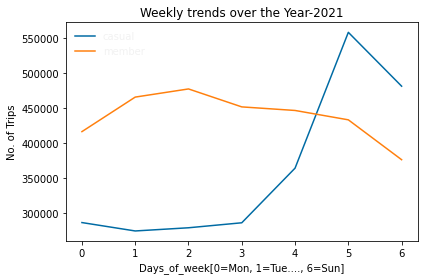

In [16]:
#setting style
plt.style.use("tableau-colorblind10")

#plot command
ana_1_pv.plot(xlabel='Days_of_week[0=Mon, 1=Tue...., 6=Sun]',ylabel='No. of Trips', title='Weekly trends over the Year-2021')

# formatting
plt.tight_layout()
mpl.rcParams['text.color'] = '#F2F2F2'
mpl.rcParams['axes.labelcolor'] = '#F2F2F2'
mpl.rcParams['xtick.color'] = '#F2F2F2'
mpl.rcParams['ytick.color'] = '#F2F2F2'
plt.legend(frameon=False)

#saving and displaying plot
plt.savefig('weekely_trends.png', transparent = True)
plt.show()

As seen in above analysis, we can observe that,
### **Observation-1**: 
> *On weekdays, Members use more bikes*

> *On weekends, Casual lead the charts.*

**Note:** 0=Monday, 1=Tuesday.... 6=Sunday


#### 3.2 Monthly Usage trend

In [17]:
ana_2 = q1_final_df.groupby(['started_at_month','member_casual']).trip_duration_seconds.aggregate([len])
ana_2_pv = pd.pivot_table(ana_2.reset_index(), index='started_at_month', columns = 'member_casual', values='len')
ana_2_pv

member_casual,casual,member
started_at_month,,
1,18117,78711
2,10130,39488
3,84028,144456
4,136590,200602
5,256888,274691
6,370636,358893
7,442011,380317
8,412608,391637
9,363840,392200


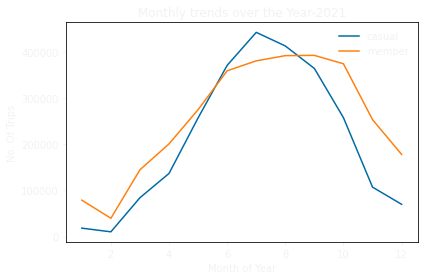

In [18]:
plt.style.use("tableau-colorblind10")
ana_2_pv.plot(xlabel='Month of Year',ylabel='No. Of Trips', title='Monthly trends over the Year-2021')

# formatting
plt.tight_layout()
mpl.rcParams['text.color'] = '#F2F2F2'
mpl.rcParams['axes.labelcolor'] = '#F2F2F2'
mpl.rcParams['xtick.color'] = '#F2F2F2'
mpl.rcParams['ytick.color'] = '#F2F2F2'
plt.legend(frameon=False)

plt.savefig('monthly_trends.png', transparent = True)
plt.show()

As seen in above analysis, we can observe that,
### **Observation-2**: 
> *Between mid-May to Aug, Casual riders use more bike than Member riders.*

> *Otherwise, Member riders use bikes more consistently. The line graph tends to reduce at start and end of the year which reflect holiday season.*


#### 3.3 Daily usage trend

In [19]:
ana_3 = q1_final_df.groupby(['started_at_hour','member_casual']).trip_duration_seconds.aggregate([len])
ana_3_pv = pd.pivot_table(ana_3.reset_index(), index='started_at_hour', columns = 'member_casual', values='len')
ana_3_pv

member_casual,casual,member
started_at_hour,,
0,53912,33134
1,39238,21900
2,25556,12458
3,14073,7160
4,9953,8143
5,12546,30037
6,25729,81833
7,46712,149681
8,63529,173234


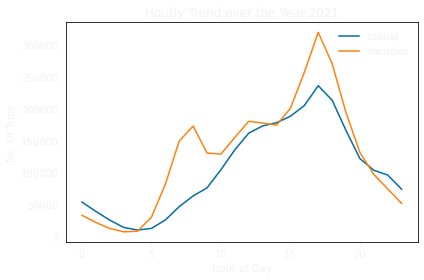

In [20]:
plt.style.use("tableau-colorblind10")
ana_3_pv.plot(xlabel='Hour of Day', ylabel='No. Of Trips', title='Hourly Trend over the Year-2021')

# formatting
plt.tight_layout()
mpl.rcParams['text.color'] = '#F2F2F2'
mpl.rcParams['axes.labelcolor'] = '#F2F2F2'
mpl.rcParams['xtick.color'] = '#F2F2F2'
mpl.rcParams['ytick.color'] = '#F2F2F2'
plt.legend(frameon=False)

plt.savefig('Hourly_trends.png', transparent = True)
plt.show()

As seen in above analysis, we can observe that,
### **Observation-3**: 
> *Member riders use rides more in between 5th to 20th hour of the day.*

> *Other times, casual riders ride more.*

#### 3.4 rideable types

In [21]:
ana_4 = q1_final_df.groupby(['rideable_type','member_casual']).rideable_type.aggregate([len])
ana_4_pv = pd.pivot_table(ana_4.reset_index(), index='rideable_type', columns = 'member_casual', values='len')
ana_4_pv

member_casual,casual,member
rideable_type,,
classic_bike,1266527,1984219
docked_bike,312334,1
electric_bike,949803,1081526


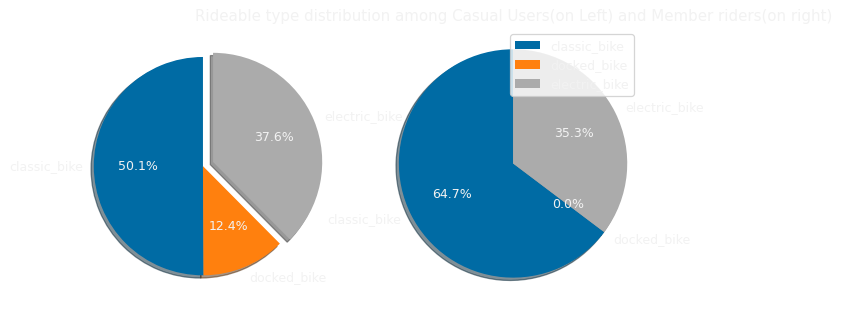

In [22]:
fig = plt.figure(figsize=(8,4),dpi=90)
plt.style.use('tableau-colorblind10')

ax1 = fig.add_subplot(121)

ax1.pie(ana_4_pv.casual, labels=['classic_bike', 'docked_bike', 'electric_bike'], explode=(0,0,0.1), shadow=True,
        startangle=90, autopct='%1.1f%%')

ax2 = fig.add_subplot(122)

ax2.pie(ana_4_pv.member, labels=['classic_bike', 'docked_bike', 'electric_bike'], shadow=True,
        startangle=90, autopct='%1.1f%%')

ax1.axis('equal')
ax2.axis('equal')
plt.title('Rideable type distribution among Casual Users(on Left) and Member riders(on right)')
plt.legend()
plt.show()

So, above analysis is enough to answer the first business question:

We confirmed that,

1. Most of *Member riders* are using bikes *for office commutes*, this observation is confrimed in all Yearly, Monthly and Daily trends.
2. In Yearly trend, between June and Aug, Casual riders use bikes more than Members. Through third-party resources it is hinted that it is because of rise in number of tourist in that time range. This time is bussiest time for Travel and Tourism in the city, so tourist might be using bikes a lot.

*[Third Party Article](https://travel.usnews.com/Chicago_IL/When_To_Visit/#:~:text=Popular%20Times%20to%20Visit%20Chicago)[Google chrome suggested]*

## Extra Question: Why would casual riders buy annual membership?

- To better answer this question, I checked divvy's website(dated back to Sep'2021). Here's what I found about their pricing:
    1. Casual Rides:
    
        1.1. **Single Ride**: **3.30 USD/30 mins** ride, 0.15/minute afterwards
        
        1.2. **Day Pass Ride**: **15 USD/Unlimited 180min rides** for 24 hour, 0.15 USD post 180mins bracket to keep using same bike.
    2. Member Rides: **9 USD/month** (108 USD billed annually)
    
        Unlimited 45min ride/bike are covered under Membership, if you want to keep using same bike for more than 45min then 0.15 USD/min
        
- Judging from the fare and the usage pattern there is no straight way to convince regular users to buy annual membership. We can do few analysis to understand pattern of usage for casual riders.
 
     + Understand trip duration trends in weekdays and weekends

In [23]:
q2_df = complete_21_data.filter(['ride_id','rideable_type','started_at','ended_at','member_casual','start_lat','start_lng','end_lat','end_lng'],axis=1)
q2_df['started_at'] = pd.to_datetime(q2_df['started_at'])
q2_df['ended_at'] = pd.to_datetime(q2_df['ended_at'])
q2_df['trip_duration_seconds'] = (q2_df['ended_at'] - q2_df['started_at'])/np.timedelta64(1,'s')
q2_df_td_nz = q2_df.loc[q2_df.trip_duration_seconds >0]
q2_df_td_nz['started_at_wn'] = q2_df_td_nz.started_at.dt.week
# # q1_df_td_nz['started_at_dow'] = q1_df_td_nz['started_at'].dt.dayofweek.replace({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})
q2_df_td_nz['started_at_dow'] = q2_df_td_nz.started_at.dt.dayofweek
q2_df_td_nz['started_at_month'] = q2_df_td_nz.started_at.dt.month
q2_df_td_nz['started_at_hour'] = q2_df_td_nz.started_at.dt.hour
q2_df_td_nz

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value

,ride_id,rideable_type,started_at,ended_at,member_casual,start_lat,start_lng,end_lat,end_lng,trip_duration_seconds,started_at_wn,started_at_dow,started_at_month,started_at_hour
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member,41.900341,-87.696743,41.890000,-87.720000,625.0,3,5,1,16
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member,41.900333,-87.696707,41.900000,-87.690000,244.0,4,2,1,18
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member,41.900313,-87.696643,41.900000,-87.700000,80.0,3,3,1,22
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member,41.900399,-87.696662,41.920000,-87.690000,702.0,1,3,1,13
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual,41.900326,-87.696697,41.900000,-87.700000,43.0,3,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595058,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,casual,41.882289,-87.639752,41.890000,-87.610000,1153.0,49,6,12,13
5595059,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,member,41.882123,-87.640053,41.889106,-87.638862,421.0,49,0,12,19
5595060,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,member,41.881956,-87.639955,41.880254,-87.629603,497.0,48,3,12,8
5595061,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,member,41.860000,-87.720000,41.850000,-87.710000,853.0,50,0,12,9


Since analysis is only targeted for Casual riders, we can filter above dataframe

In [24]:
q2_final = q2_df_td_nz.loc[q2_df_td_nz.member_casual == 'casual']
q2_final

,ride_id,rideable_type,started_at,ended_at,member_casual,start_lat,start_lng,end_lat,end_lng,trip_duration_seconds,started_at_wn,started_at_dow,started_at_month,started_at_hour
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual,41.900326,-87.696697,41.900000,-87.700000,43.0,3,5,1,2
5,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,casual,41.900409,-87.696763,41.940000,-87.710000,3227.0,1,5,1,14
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,casual,41.900374,-87.696688,41.899180,-87.672178,587.0,1,5,1,15
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,casual,41.900379,-87.696716,41.899149,-87.672177,537.0,1,5,1,15
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,casual,41.900363,-87.696704,41.899181,-87.672200,609.0,3,6,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595054,08E5EC2EC583D230,electric_bike,2021-12-17 07:55:47,2021-12-17 08:03:45,casual,41.882002,-87.639457,41.890000,-87.620000,478.0,50,4,12,7
5595055,8DF0DBB049906332,electric_bike,2021-12-01 16:50:52,2021-12-01 16:55:18,casual,41.881999,-87.639265,41.888415,-87.644342,266.0,48,2,12,16
5595056,DFE48801A70DFEA7,electric_bike,2021-12-23 21:28:41,2021-12-23 21:36:27,casual,41.882197,-87.639226,41.880000,-87.650000,466.0,51,3,12,21
5595057,92BBAB97D1683D69,electric_bike,2021-12-24 15:42:09,2021-12-24 19:29:35,casual,41.881800,-87.639970,41.880000,-87.640000,13646.0,51,4,12,15


We can start by finding mean trip duration for each day of the week.

In [25]:
# q2_ana_1 = q2_final.groupby('started_at_dow').trip_duration_seconds.agg(lambda x:x.value_counts().idxmax())
q2_ana_1 = q2_final.groupby('started_at_dow').trip_duration_seconds.mean()
q2_ana_1 = q2_ana_1.reset_index()
q2_ana_1

,started_at_dow,trip_duration_seconds
0,0,1912.747311
1,1,1678.529274
2,2,1659.664429
3,3,1662.346566
4,4,1821.106072
5,5,2082.597987
6,6,2254.257336


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]


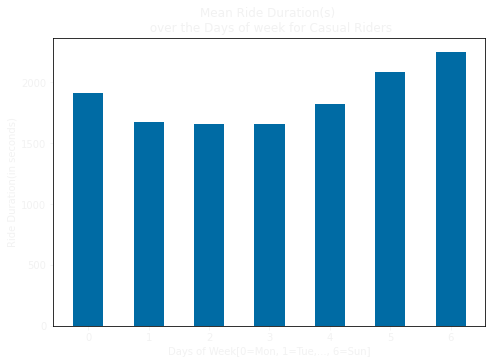

In [26]:
# q2_ana_1 = q2_ana_1.reset_index()

plt.style.use("tableau-colorblind10")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(q2_ana_1.started_at_dow,q2_ana_1.trip_duration_seconds, width=0.50)
# fig.suptitle('Mean Ride Duration(s) \n over the Days of week')
ax.set_title('Mean Ride Duration(s) \n over the Days of week for Casual Riders')
ax.set_xlabel('Days of Week[0=Mon, 1=Tue,..., 6=Sun]')
ax.set_ylabel('Ride Duration(in seconds)')

# formatting
plt.tight_layout()
mpl.rcParams['text.color'] = '#F2F2F2'
mpl.rcParams['axes.labelcolor'] = '#F2F2F2'
mpl.rcParams['xtick.color'] = '#F2F2F2'
mpl.rcParams['ytick.color'] = '#F2F2F2'
# plt.legend(frameon=False)

plt.savefig('mean_ride_duration_weekly_casual_riders.png', transparent = True)
plt.show()

As we can see more or less, Casual riders ride more or less around 30mins(1800s) time limit on weekdays. On top of that consistency over the weeks(both for weekdays and weekends) varies use to user.

So based on all the analysis:

## Suggestion:
    1. Creating new plan targetting casual riders. In this plan we can provide limited number of rides on weekdays and slightly more number of rides on weekend.
    
    2. We can give special discount around month of July/Aug as that is when there are more casual users/ tourists using Cyclistic. This creates lack of bikes at popular docking stations. This will encourage more people to signup for Normal Yearly Membership
    
    3. We can reward casual riders for transferring bikes from crowded docks to starving docks in form of extra free trips/ extra free minutes.